In [14]:
from gp_model import *
from tqdm import tqdm_notebook as tqdm

%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
obs_variance=1e-6

<IPython.core.display.Javascript object>


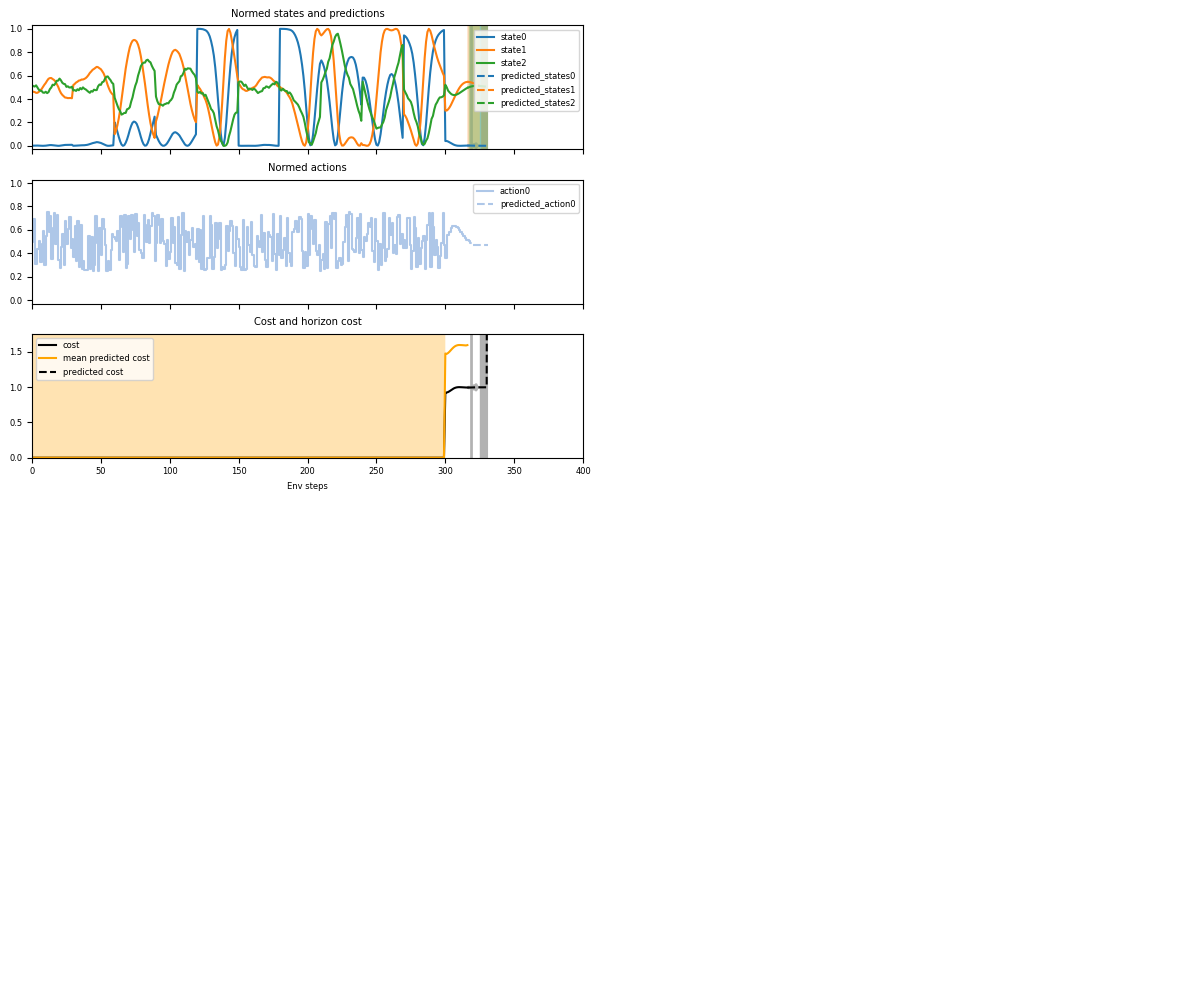

/Users/nicochristianson/OneDrive - California Institute of Technology/Courses/2021 Spring/CS 159/Project/CS159-project/./Data-Efficient-Reinforcement-Learning-with-Probabilistic-Model-Predictive-Control/control_objects/utils.py:416: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  self.axes[2].set_ylim(0, np.max([np.max(self.mean_predicted_cost[:(self.num_points_show + 1)]),


ValueError: Axis limits cannot be NaN or Inf

In [16]:
gp_model = train_gp_model(num_training_rollouts=10, 
                          num_training_actions=30, 
                          num_test_steps=100, 
                          training_input_range=2, 
                          obs_variance=obs_variance,
                          max_control_torque=4)

In [5]:
env = pendulum.PendulumEnv(max_torque=4)
env.reset()

s_observation = np.diag(np.full(3, obs_variance))#obs_variance))
num_test_steps = 50
losses_tests = np.ones(num_test_steps)
state_history = np.zeros((num_test_steps,3))
control_history = np.zeros(num_test_steps)
loss_history = np.zeros(num_test_steps)

observation = state_to_obs(env.state)
for index_iter in tqdm(range(num_test_steps)):
    state_history[index_iter] = observation
    action, add_info_dict = gp_model.compute_prediction_action(observation, s_observation)
    control_history[index_iter] = action
    noise = np.sqrt(obs_variance)*np.random.randn(1)
    new_observation, reward, done, info = env.step(action + noise)
    try:
        env.render()
    except:
        pass
    loss_history[index_iter] = add_info_dict['cost']
#     print(add_info_dict)
#     gp_model.add_point_memory(observation, action, new_observation, reward,
#                                     add_info_dict=add_info_dict, params_memory=params_memory)
#     live_plot_obj.add_point_update(observation, action, add_info_dict)
    observation = new_observation

<ipython-input-5-842aa29f6d49>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index_iter in tqdm(range(num_test_steps)):


  0%|          | 0/50 [00:00<?, ?it/s]

NameError: name 'gp_model' is not defined

In [24]:
states = [obs_to_state(obs) for obs in state_history]

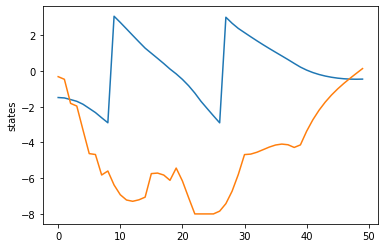

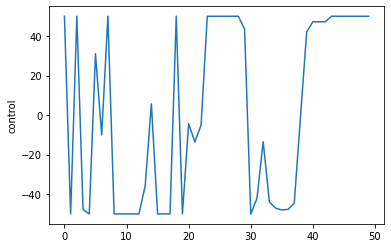

In [25]:
%matplotlib inline
plt.plot(states)
plt.ylabel('states')
plt.show()
plt.plot(control_history)
plt.ylabel('control')
plt.show()